In [2]:
%matplotlib inline
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import csv
import copy


In [3]:
### DATA CLEANING ###

clean_data = [[],[]]
for data in csv.reader(open("csvdata/temp1.csv")):
    if data[0] != 'x':
        clean_data[0] += [float(data[0])]

for data in csv.reader(open("csvdata/temp2.csv")):
    if data[0] != 'x':
        clean_data[1] += [float(data[0])]
        
# for data in csv.reader(open("csvdata/temp3.csv")):
#     if data[0] != 'x':
#         clean_data[2] += [float(data[0])]
        
# for data in csv.reader(open("csvdata/temp4.csv")):
#     if data[0] != 'x':
#         clean_data[3] += [float(data[0])]
        
# print(clean_data)

with open('plc.csv', 'w', newline='') as csvfile:
    datawriter = csv.writer(csvfile, delimiter=',',
                            quotechar='"', quoting=csv.QUOTE_MINIMAL)
    datawriter.writerow(['Predicate Evaluation'] + clean_data[0])
    datawriter.writerow(['State Transfer'] + clean_data[1])
#     datawriter.writerow(['Update'] + clean_data[2])
#     datawriter.writerow(['Update Splits'] + clean_data[3])

In [81]:
pace_data = []
data_labels = []
with open('csvdata/pacemaker.csv', 'r') as file:
    for row in csv.reader(file):
        data_labels += [row[0]]
        pace_data += [[float(d) - 150000 for d in row[1:]]]

pace_data.reverse()
data_labels.reverse()

up_splits_data = [d + 150000 for d in pace_data[0]]
# pace_data = np.array(pace_data)
# print(pace_data)
# print(data_labels)

/Users/rtsang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


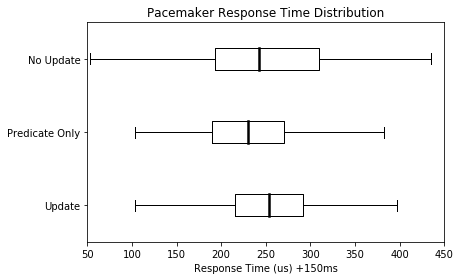

In [122]:
x = [50*i for i in range(1,10)]

medianprops = dict(linestyle='-', linewidth=2.5, color='black')

fig1, ax1 = plt.subplots(figsize=(6.5,4))

bwplot_update = ax1.boxplot(pace_data[1:],
                            vert=False,
#                             patch_artist=True,
                            labels=data_labels[1:],
                            showfliers=False,
                            medianprops=medianprops)
ax1.set_xticks(x)

ax1.set_title('Pacemaker Response Time Distribution')
ax1.set_xlabel('Response Time (us) +150ms')

ax1.set_xlim(50, 450)
# ax1.xaxis.grid(True)

# colors = ['lightgrey', 'lightgrey', 'lightgrey']

# for patch, color in zip(bwplot_update['boxes'], colors):
#     patch.set_facecolor(color)

# for tick in ax1.xaxis.get_major_ticks():
#     tick.tick1line.set_markersize(5)
#     tick.tick2line.set_markersize(5)

# ax1.set_yticklabels(data_labels[1:], rotation=60)
fig1.tight_layout()
fig1.show()

fig1.savefig('PacemakerResponseDistribution_Update.png', dpi=150)

/Users/rtsang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


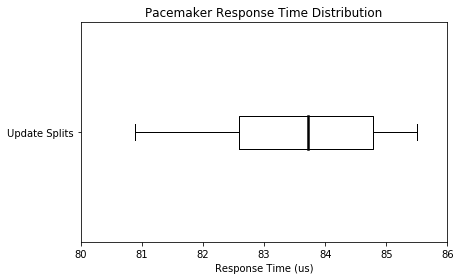

In [123]:
# x = [50*i for i in range(1,10)]

medianprops = dict(linestyle='-', linewidth=2.5, color='black')

fig2, ax2 = plt.subplots(figsize=(6.5,4))

bwplot_update = ax2.boxplot(up_splits_data,
                            vert=False,
#                             patch_artist=True,
                            labels=[data_labels[0]],
                            showfliers=False,
                            medianprops=medianprops)
# ax2.set_xticks(x)

ax2.set_title('Pacemaker Response Time Distribution')
ax2.set_xlabel('Response Time (us)')

ax2.set_xlim(80, 86)

# ax2.xaxis.grid(True)

# colors = ['lightgrey', 'lightgrey', 'lightgrey']

# for patch, color in zip(bwplot_update['boxes'], colors):
#     patch.set_facecolor(color)

# for tick in ax2.xaxis.get_major_ticks():
#     tick.tick1line.set_markersize(5)
#     tick.tick2line.set_markersize(5)
fig2.tight_layout()
fig2.show()

fig2.savefig('PacemakerResponseDistribution_Splits.png', dpi=150)

In [7]:
plc_data = []
plc_labels = []
with open('csvdata/plc.csv', 'r') as file:
    for row in csv.reader(file):
        plc_labels += [row[0]]
        plc_data += [[float(d) for d in row[1:]]]

plc_data.reverse()
plc_labels.reverse()

# plc_data = np.array(pace_data)
# print(plc_data)
# print(plc_labels)

/Users/rtsang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


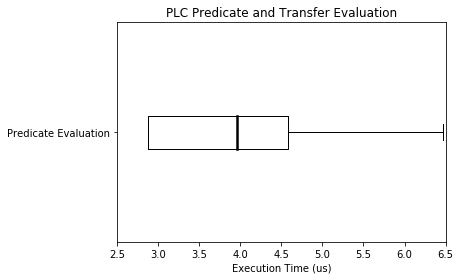

In [12]:
medianprops = dict(linestyle='-', linewidth=2.5, color='black')

fig1, ax1 = plt.subplots(figsize=(6.5,4))

bwplot_update = ax1.boxplot(plc_data[1],
                            vert=False,
#                             patch_artist=True,
                            labels=[plc_labels[1]],
                            showfliers=False,
                            medianprops=medianprops)

ax1.set_title('PLC Predicate and Transfer Evaluation')
ax1.set_xlabel('Execution Time (us)')

ax1.set_xlim(2.5, 6.5)
# ax1.xaxis.grid(True)

# colors = ['lightgrey', 'lightgrey', 'lightgrey']

# for patch, color in zip(bwplot_update['boxes'], colors):
#     patch.set_facecolor(color)

# for tick in ax1.xaxis.get_major_ticks():
#     tick.tick1line.set_markersize(5)
#     tick.tick2line.set_markersize(5)

# ax1.set_yticklabels(data_labels[1:], rotation=60)
fig1.tight_layout()
fig1.show()

fig1.savefig('PLCPredicate_TransferEvaluation.png', dpi=150)